In [10]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


In [11]:
data_path = Path("../data/synthetic_normal_2_labeled.csv")
test_size = 0.2
random_state = 42

df = pd.read_csv(data_path)
df.head()

,sentence,label
0,Wir reagieren bereits jetzt und bitten Sie ein...,1
1,"Wir fordern Sie auf, bereits jetzt zu reagiere...",0
2,Was ist Lippenherpes?,1
3,"Der Lippenherpes, auch known als Herpes simple...",0
4,Woran können Sie Lippenherpes erkennen?,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df["sentence"].astype(str), df["label"].astype(int),
    test_size=test_size, random_state=random_state, stratify=df["label"],
)
print(f"Train size: {len(X_train):,}; Test size: {len(X_test):,}")

Train size: 51,076; Test size: 12,769


In [13]:
pipeline = make_pipeline(
    TfidfVectorizer(
        ngram_range=(1, 2),
        max_features=200_000,
        min_df=2,
        max_df=0.9,
    ),
    LogisticRegression(
        max_iter=1000,
        n_jobs=-1,
        class_weight="balanced",
    ),
)

pipeline.fit(X_train, y_train)

,steps,"[('tfidfvectorizer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [14]:
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.3f}")
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, digits=3))

Test accuracy: 0.862

Classification report:

              precision    recall  f1-score   support

           0      0.864     0.858     0.861      6384
           1      0.859     0.865     0.862      6385

    accuracy                          0.862     12769
   macro avg      0.862     0.862     0.862     12769
weighted avg      0.862     0.862     0.862     12769



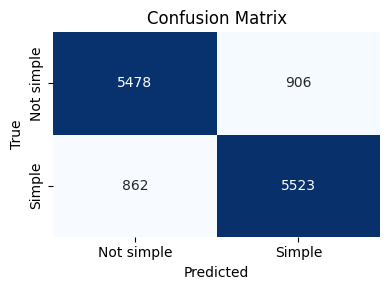

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not simple", "Simple"],
            yticklabels=["Not simple", "Simple"],
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [16]:
for text, true_label, pred_label in zip(X_test[:5], y_test[:5], y_pred[:5]):
    print(f"label={true_label} pred={pred_label} :: {text[:140]}{'...' if len(text) > 140 else ''}")

label=1 pred=1 :: Machen Sie mit der Wiederbelebung solange weiter, bis Hilfe kommt.
label=0 pred=0 :: Eine prophylaktische Darmspiegelung dient auch zur Früh Erkennung von Krankheiten.
label=0 pred=0 :: Es bestand in der Bundesrepublik Deutschland bis zum Mauerfall in Westdeutschland.
label=0 pred=0 :: Deswegen hatte sich Heike Werner beträchtliche Besorgnisse erregt.
label=0 pred=0 :: Die Gallenblasenentzündung wird nicht therapiert.
